In [2]:
import numpy as np
import numpy.random as rand
import numpy.linalg as linalg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import Image
from preprocessing import *

%matplotlib inline


In [3]:
def pca(X, pc=2):
    '''
    Performs PCA on X, returns a principal components that can be used to map X to lower dimension. Note: rank = min(m, n-1)
    Parameter:
        X [m, n] - data
        pc           - #of components to be returned
    Returns:
        pc principal components
    

    '''
    # demean X
    m, n = X.shape
    X = X - np.array([np.mean(X, axis=1)]).T

    # get covariance of x
    covX = np.dot(X,X.T) / len(X)

    # eigen analysis
    w, v = linalg.eig(covX)

    # remove numerical approx errors (ones near 0, ones that are negative)
    w = np.real(w)
    v = np.real(v)

    # sort by decreasing order of eigen vals
    rank = min(m, n-1)
    idx = w.argsort()[::-1]
    w = w[idx[0:rank]]
    v = v[:, idx[0:rank]]
    
    return v[:, 0:pc]

In [4]:
img = mpimg.imread('lena.png')
gray_img = rgb2gray(img)
#plt.imshow(grey_img, cmap=plt.get_cmap('gray'))

p = 16
data = extract_patches(gray_img, (p,p))




In [5]:
n = len(data)
X = np.array(data).reshape(n, p*p).T
X = centering(X)
X = contrast_normalization(X)

In [6]:
v = pca(X, p*p)

(272, 272)


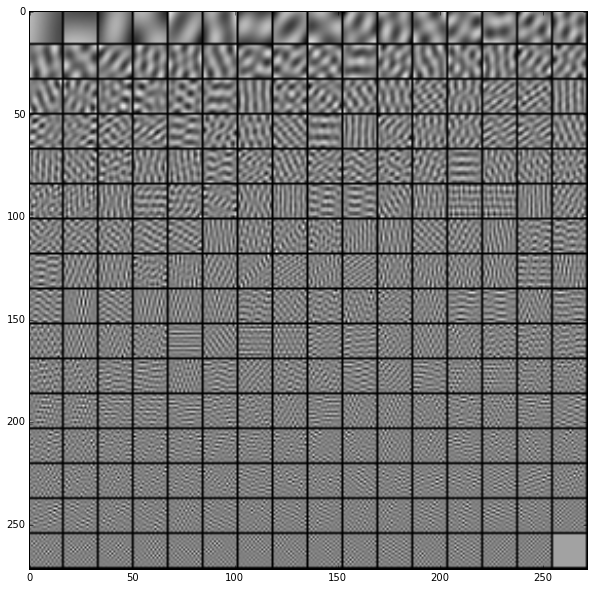

In [7]:
vis = visualise_patches(v.T.reshape(p*p,p,p) - np.min(v), (p,p), padding=True)
print vis.shape
plt.figure(figsize=(10,10))
plt.imshow(vis, cmap=plt.get_cmap('gray'))

In [8]:
# k-mean
def k_mean(X, k, itr=10):
    '''
    Parameter:
        X [m,n] - data (np array, non empty)
        k       - number of centroids
        
    returns k-means
    '''
    m, n = X.shape
    
    # Transpose for convenience
    X = X.T
    
    # initialise k centroids
    centroids = rand.random([k,m]) - .5
    
    def sqnorm(x):
        return np.dot(x,x)

    for t in xrange(itr):
        # assign each data points to centroids
        assignments = {}
        for i in xrange(k):
            assignments[i] = []
            
        for i in xrange(n):
            dist = centroids - X[i,:]
            k_ass = np.argmin(map(sqnorm, dist))
            assignments[k_ass].append(X[i,:])

        # update k centroids
        for i in xrange(k):
            arr = np.array(assignments[i])
            centroids[i] = np.mean(arr,axis=0)

    return centroids


(272, 272)


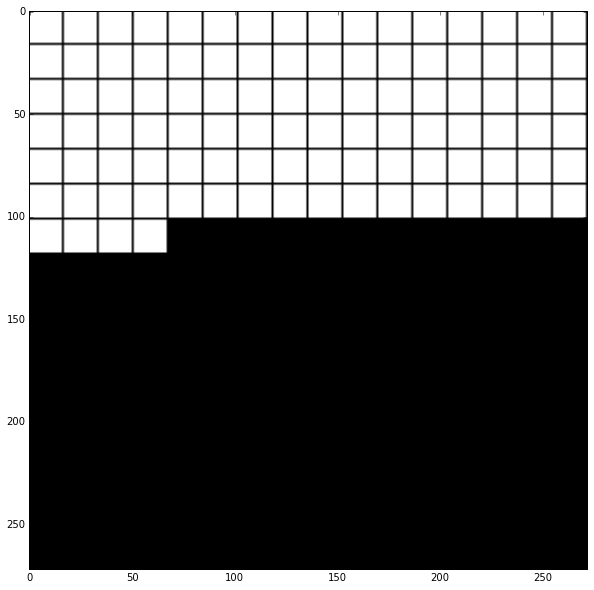

In [22]:
n = 10000
k = 100
Xp = X[:,0:n]
centroids = k_mean(Xp, k, 10)

vis = visualise_patches(centroids.reshape(k, p, p) - np.min(centroids), (p,p), padding=True)
print vis.shape
plt.figure(figsize=(10,10))
plt.imshow(vis, cmap=plt.get_cmap('gray'))

In [49]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print X.shape
k = 256
pca = PCA(n_components=k).fit(X[:,:].T)
k_mean_estimator = KMeans(init=pca.components_, n_clusters=k, n_init=1)
k_mean_estimator.fit(X[:,:].T)


(256, 247009)


KMeans(copy_x=True,
    init=array([[-0.09569, -0.08848, ...,  0.08856,  0.09435],
       [-0.07031, -0.07726, ...,  0.07205,  0.06214],
       ...,
       [-0.00036, -0.00202, ..., -0.00164,  0.00079],
       [ 0.0625 ,  0.0625 , ...,  0.0625 ,  0.0625 ]]),
    max_iter=300, n_clusters=256, n_init=1, n_jobs=1,
    precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

256
(256, 256) 256
(272, 272)


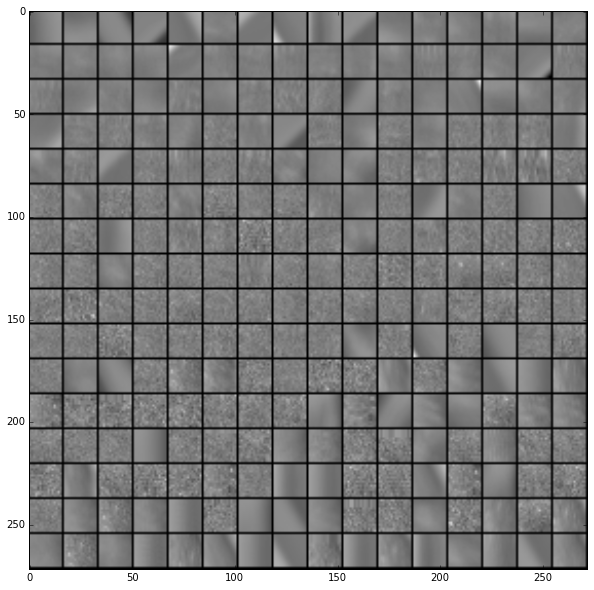

In [48]:
centroids = k_mean_estimator.cluster_centers_

print k
print centroids.shape, p*p
vis = visualise_patches(centroids.reshape(k, p, p) - np.min(centroids), (p,p), padding=True)
print vis.shape
plt.figure(figsize=(10,10))
plt.imshow(vis, cmap=plt.get_cmap('gray'))

In [32]:
k_mean_estimator.fit?